In [1]:
import pandas as pd

In [2]:
##Loading the data

In [3]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\data_vis_test.csv",na_filter=True)

In [4]:
df.shape

(10000, 4)

In [5]:
df.head()

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model
0,59742df346ab8ae80d7320e5,1.509256e+15,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,1.506950e+15,Xiaomi,Redmi 4A
2,59c8671a625fbbd425d735ae,1.506306e+15,NaN,Swipe_Elite_3
3,591ff88228d8f8c86bfd75bf,1.506840e+15,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,1.509862e+15,Sony,C6902


In [6]:
## Data Preprocessing ## 

In [7]:
## Renaming the columns
df.columns = ['UserID','Time','Mobile_Name','Device_Name']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
UserID         9998 non-null object
Time           9995 non-null float64
Mobile_Name    9383 non-null object
Device_Name    10000 non-null object
dtypes: float64(1), object(3)
memory usage: 195.4+ KB


In [9]:
## We see that there are some missing values in Mobile_Name
## Removing the missing value records
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9376 entries, 0 to 9999
Data columns (total 4 columns):
UserID         9376 non-null object
Time           9376 non-null float64
Mobile_Name    9376 non-null object
Device_Name    9376 non-null object
dtypes: float64(1), object(3)
memory usage: 256.4+ KB


In [11]:
from datetime import datetime as dt

In [12]:
## Converting the linux timestamp to normal timestamp
df['Time']=pd.to_datetime(df.Time,unit='us',utc=None)

In [13]:
df.head()

,UserID,Time,Mobile_Name,Device_Name
0,59742df346ab8ae80d7320e5,2017-10-29 05:52:28.059,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,2017-10-02 13:16:23.309,Xiaomi,Redmi 4A
3,591ff88228d8f8c86bfd75bf,2017-10-01 06:32:04.046,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,2017-11-05 06:12:17.239,Sony,C6902
5,59f13874bb299b692aeef502,2017-10-26 01:17:42.875,Samsung,SM-J700F


In [14]:
#Viewing the top ten Mobiles with most Devices
df1 = df['Mobile_Name'].value_counts()[:10]

In [15]:
sample = pd.DataFrame(df1)

In [16]:
check = sample.reset_index(inplace=True)

In [17]:
sample

,index,Mobile_Name
0,Samsung,2935
1,Xiaomi,1520
2,Vivo,1019
3,OPPO,929
4,Lenovo,548
5,Motorola,364
6,Micromax,330
7,LYF,270
8,Gionee,245
9,Lava,114


In [18]:
sample.columns = ['M_Brand','Count']

In [19]:
sample

,M_Brand,Count
0,Samsung,2935
1,Xiaomi,1520
2,Vivo,1019
3,OPPO,929
4,Lenovo,548
5,Motorola,364
6,Micromax,330
7,LYF,270
8,Gionee,245
9,Lava,114


In [20]:
## Visualization

In [21]:
## Bar Chart of top ten mobile names in the data set

In [22]:
from matplotlib import pyplot as plt

In [23]:
import numpy as np

In [25]:
avr = np.arange(len(sample))

In [26]:
avr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
## For increasing the size of the graph 
fig = plt.figure()
fig_size=plt.rcParams['figure.figsize']
fig_size[0]=12
fig_size[1]=9
width = .35

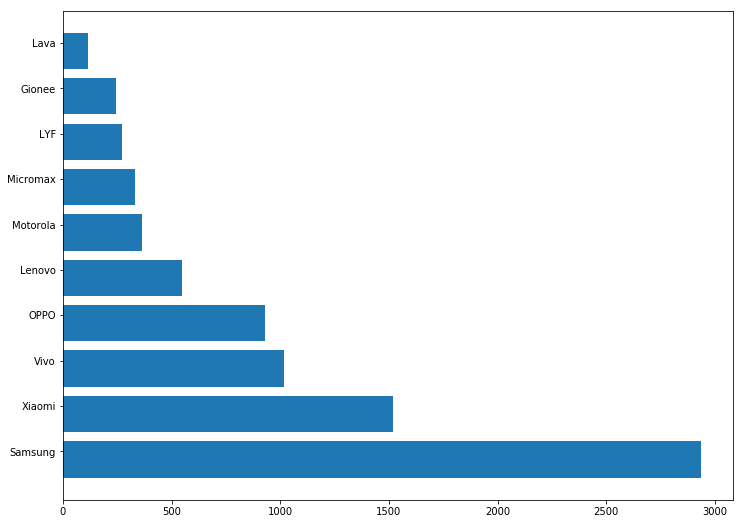

In [30]:
plt.barh(avr,sample.Count )
plt.yticks(avr + width / 2,sample.M_Brand )
plt.show()

In [48]:
## Ploting the top ten device models for top ten Mobile Brands

In [32]:
import plotly

In [33]:
import plotly.plotly as py

In [34]:
import plotly.graph_objs as go

In [37]:
def mypl(mobile):
    df2 = df[df.Mobile_Name==mobile].Device_Name.value_counts()
    df3 = df2.head(10)
    sample = pd.DataFrame(df3)
    check = sample.reset_index(inplace=True)
    sample.columns = ['D_Model','Count']
    plotly.tools.set_credentials_file(username='vineeth37', api_key='GeDXEUvqf38rK6RzxgJX')
    pic = [go.Bar(
            x = sample.Count,
            y = sample.D_Model,
            orientation = 'h'
    )]
    return pic

In [38]:
py.iplot(mypl('Samsung'), filename='Top Ten Models')

In [39]:
py.iplot(mypl('Xiaomi'), filename='Top Ten Models')

In [40]:
py.iplot(mypl('Vivo'), filename='Top Ten Models')

In [41]:
py.iplot(mypl('OPPO'), filename='Top Ten Models')

In [42]:
py.iplot(mypl('Lenovo'), filename='Top Ten Models')

In [43]:
py.iplot(mypl('Motorola'), filename='Top Ten Models')

In [44]:
py.iplot(mypl('Micromax'), filename='Top Ten Models')

In [45]:
py.iplot(mypl('LYF'), filename='Top Ten Models')

In [46]:
py.iplot(mypl('Gionee'), filename='Top Ten Models')

In [47]:
py.iplot(mypl('Lava'), filename='Top Ten Models')